## EDA in retails of 3 types of Stores

In this `EDA project` the goal is to try to explore the relationship between different features within the dataset to assess those with the **highest impact** in total sales.

It is worth mentioning that such analysis should usually be supported by a well-designed **Structured Pyramid Analysis Plan (SPAP)**.

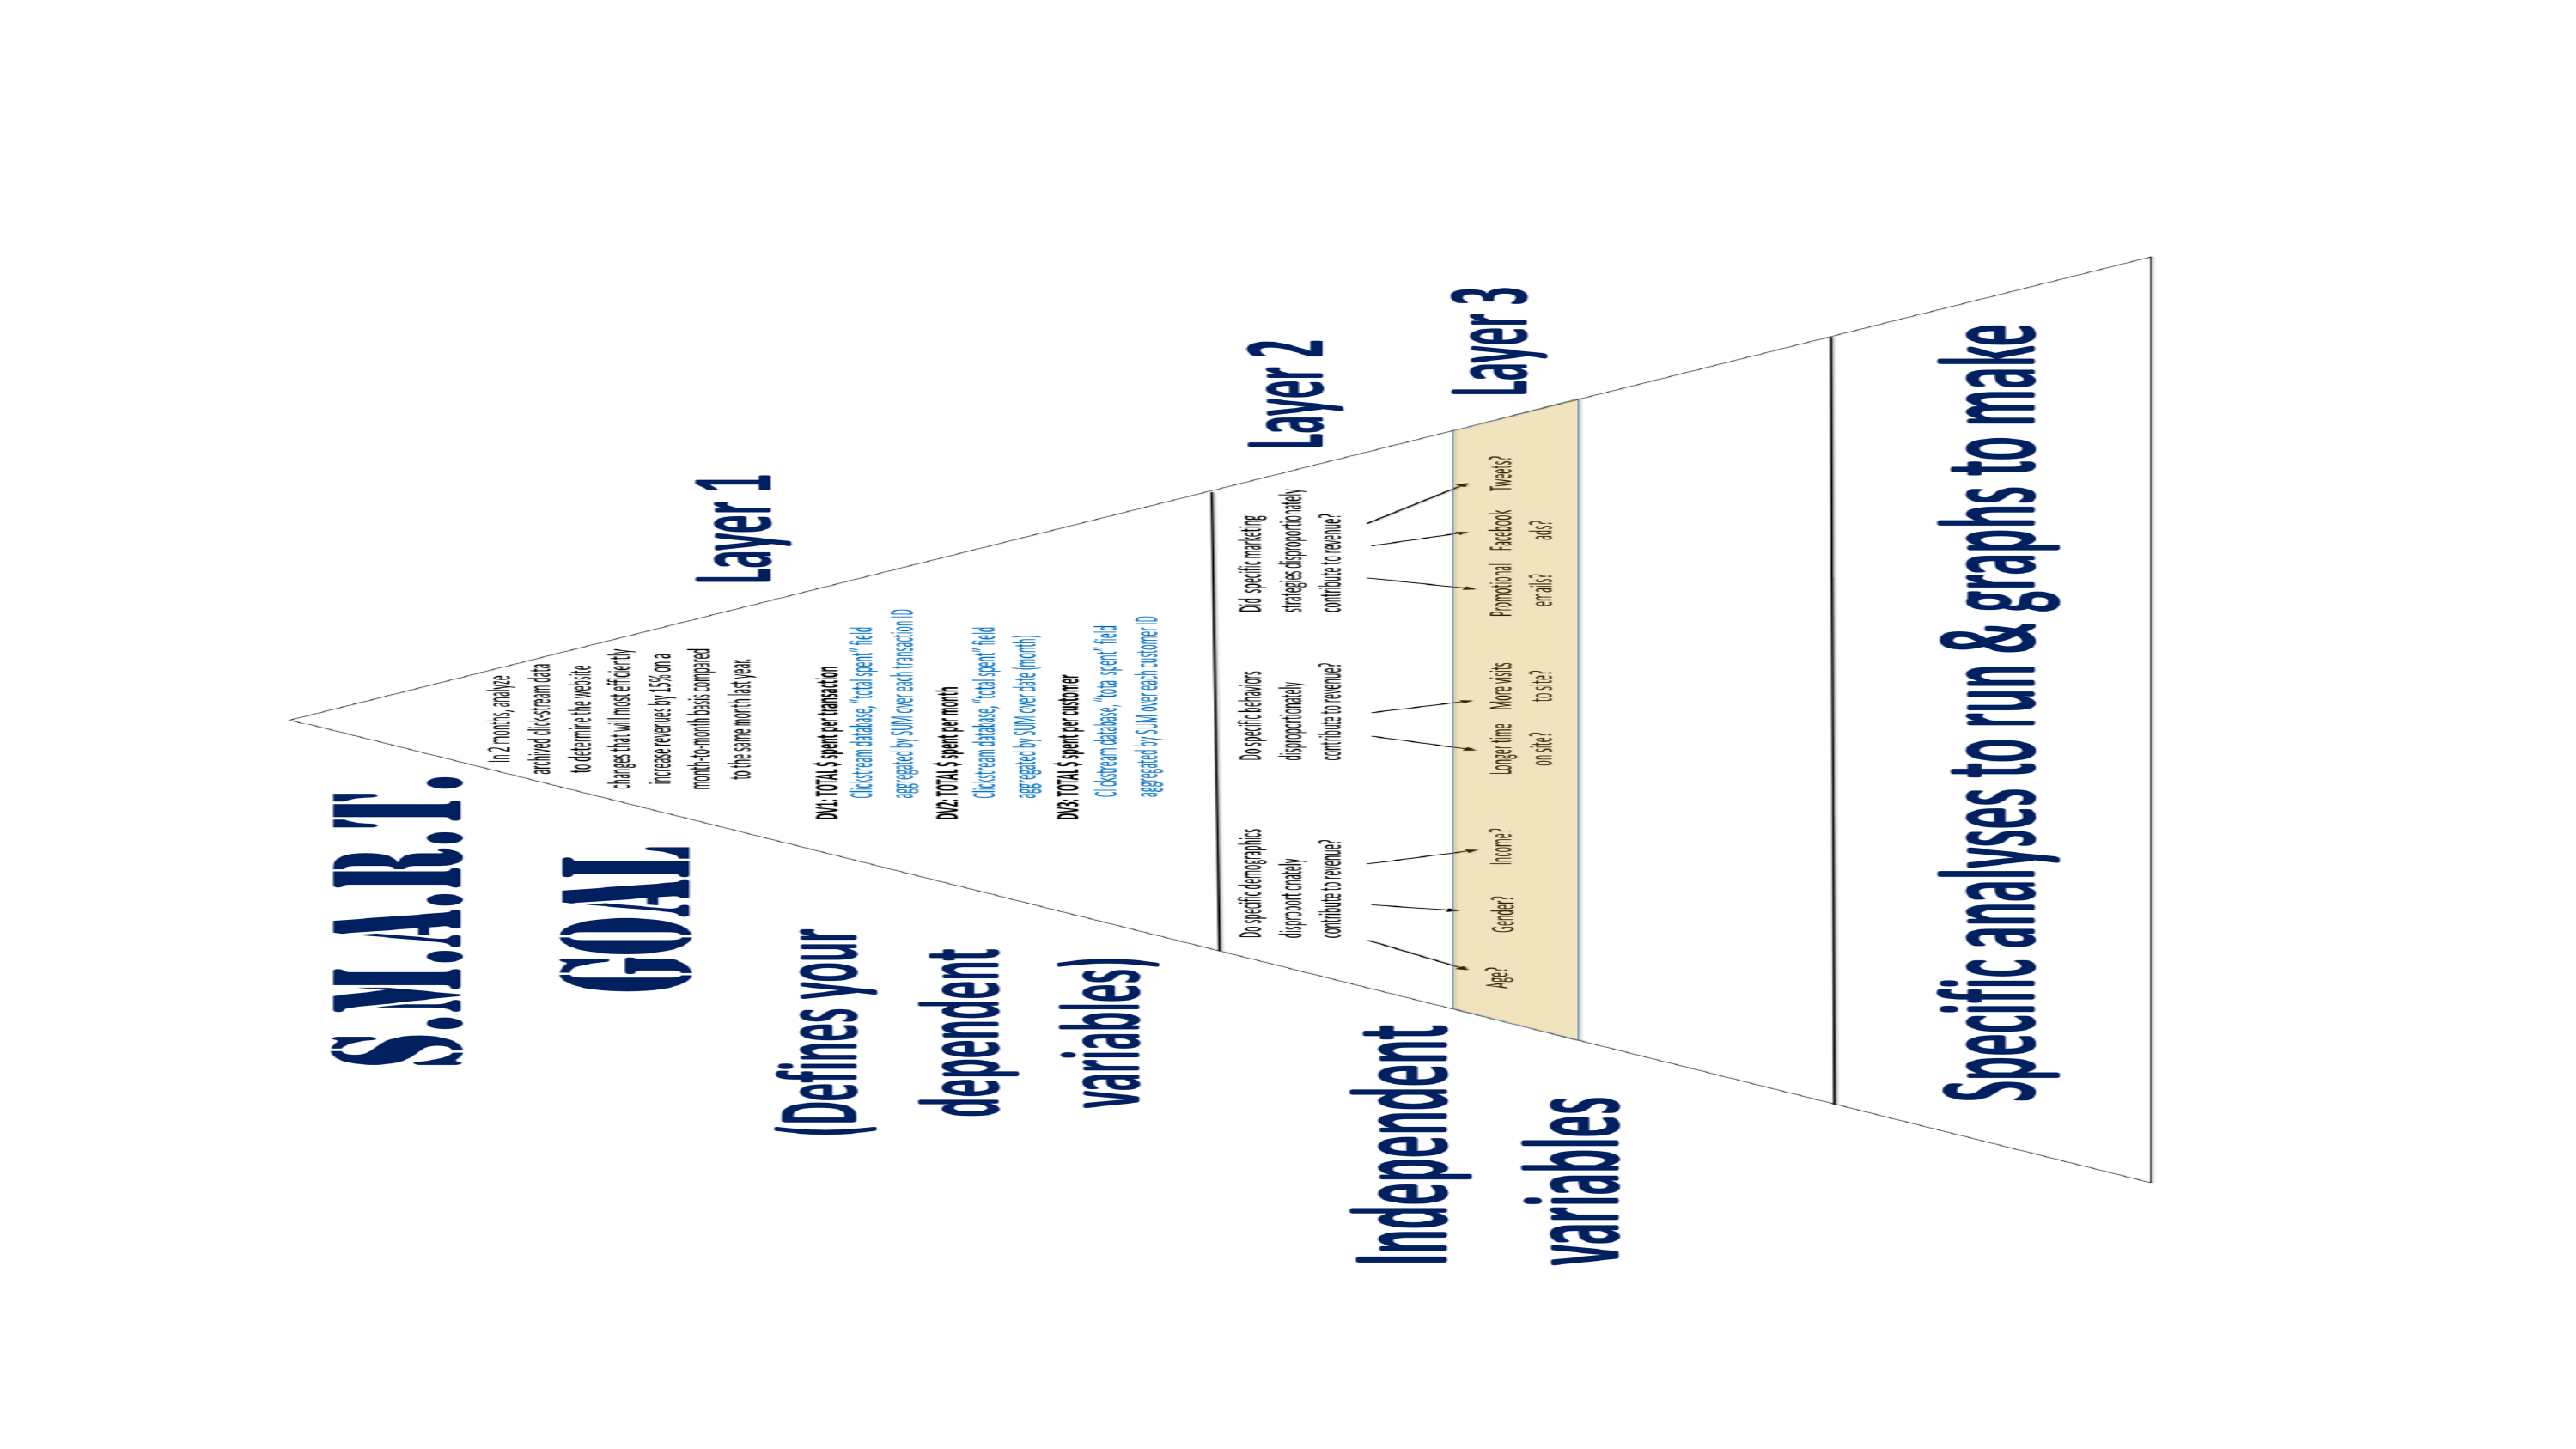

The structure of such a plan is illustrated in the picture above. In the top of the pytamid there is the project objective which should meeet the **S.M.A.R.T** criteria.<b> 

In the Second layer there are our depedent variable and in the third the indepedent which are the columns of our dataset which we try to use to assess the impact of the depedent variables to our **S.M.A.R.T** objective. 

The first thing we will do is to download our dataset from kaggle using the `opendatasets` library and open it using `pandas`. For this EDA the our not-so-smart goal is to find some correlation between the indepedent variables and the sales column and their impact on them.

In [1]:
import opendatasets as od

In [2]:
dataset_url='https://www.kaggle.com/datasets/manjeetsingh/retaildataset'
od.download(dataset_url)

Skipping, found downloaded files in ".\retaildataset" (use force=True to force download)


In [3]:
import os
os.listdir('./retaildataset')

['Features data set.csv', 'sales data-set.csv', 'stores data-set.csv']

In [4]:
import pandas as pd
features_df= pd.read_csv('./retaildataset/Features data set.csv')
sales_df= pd.read_csv('./retaildataset/sales data-set.csv')
stores_df= pd.read_csv('./retaildataset/stores data-set.csv')

In [5]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [6]:
sales_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [7]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


Some quick information about our datasets: <b>
- **features_df**: Contains data related to the store, department, and regional activity for the given dates.
- **sales_df**: Historical sales data, which covers to 2010-02-05 to 2012-11-01
- **stores_df**: Anonymized information about the 45 stores, indicating the type and size of store
    
There are 45 stores of 3 types (Type A,B,C) and we do not really now with what type of retails they are associated it. Each store has a number of departments.

First we will start with some preprocessing of our data and if necessary, some cleansing will be performed. 

In [8]:
# Let'sstart with features_df
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


For `features_df`, it is clear that the `MarkDown` columns have a lot of null values since there are no data available prior to Nov 2011. These null values will need to be handled. The rest fo the features looks like within reasonable range although some null vaues exist in `CPI (Consumer Price Index`) and `Unemployment` column as well

In [10]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [11]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [12]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [13]:
sales_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


For `sales_df` and `stores_df` the values look normal except the `Weekly_Sales` in sales_df where the min values is Negative!! This is anot a reasonable result and values<0 should be removed  

## Filtering of the dataset
First, we start with `features_df`

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
#Let's start by measuring the percentage of the null values, especially in the markdaown
null_perc=(features_df.isna().sum().sort_values(ascending=False)/len(features_df))*100
null_perc

MarkDown2       64.334554
MarkDown4       57.704518
MarkDown3       55.885226
MarkDown1       50.769231
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
IsHoliday        0.000000
dtype: float64

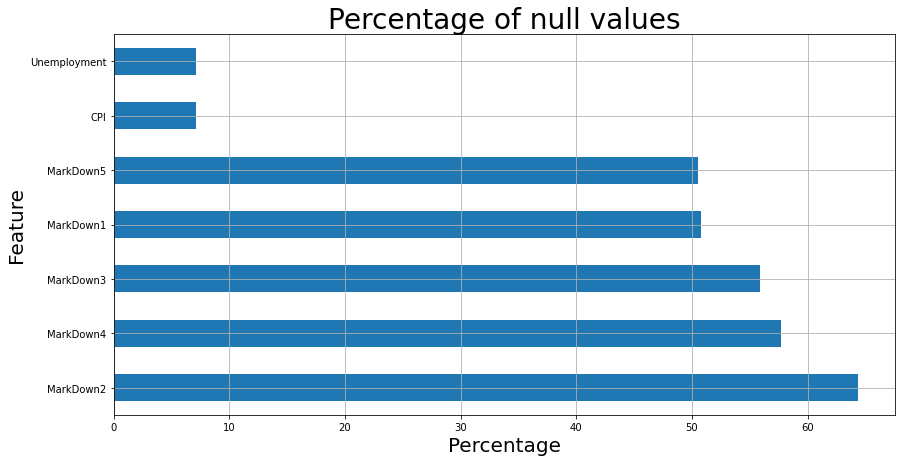

In [16]:
plt.title('Percentage of null values',fontsize=28)
plt.xlabel('Percentage',fontsize=20)
plt.ylabel('Feature',fontsize=20)
null_perc[null_perc!=0].plot(figsize=(14,7),kind='barh',grid=True);

The `Markdown2` has almost 65% of missing values which makes sense since for the markdown the collections of data starts after November 2011. This is a very difficult decision since we are facing he following scenarios.

1. Either we drop the null values in the markdown cells and losing ~60-65% of our data which could significantly influence the outcome of our analysis or,
2. We ignore those columns in our EDA and we are only dealing with the other inpt featured columns.

In this difficult choise, we prefer the second option. It is however possible in the future to proceed with the second and see if our analysis will end up in different conclusions.


In [17]:
# Bases on the above we will only fix the values concerning unemployment and CPI with the mean of their columns
features_df['CPI'].fillna(features_df['CPI'].mean(),inplace=True)
features_df['Unemployment'].fillna(features_df['Unemployment'].mean(),inplace=True)
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106000,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106000,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106000,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106000,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.826821,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.826821,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.826821,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.826821,False


The `stores_df` dataset was not in need of any filtering process. The last thing to do will be to treat all the values in weekly sales which are less than 0 in the `sales_df` dataset.

In [18]:
sales_df[sales_df['Weekly_Sales']<0].value_counts()

Store  Dept  Date        Weekly_Sales  IsHoliday
1      6     10/08/2012  -139.65       False        1
29     80    28/09/2012  -11.68        False        1
31     78    05/02/2010  -12.00        False        1
       77    03/02/2012  -19.88        False        1
       54    30/09/2011  -6.92         False        1
                                                   ..
17     49    07/01/2011  -17.97        False        1
             06/07/2012  -33.18        False        1
             06/05/2011  -7.94         False        1
             05/11/2010  -15.00        False        1
45     80    19/02/2010  -0.27         False        1
Length: 1285, dtype: int64

Again, there are 2 strategies on how we can treat those negative values; Either we are going to replace them with a statistical quantity (eg mean,median) or we are going to drop them. This time we will proceed with the second option since there not many negative values.

In [19]:
sales_df=sales_df.drop(sales_df[sales_df['Weekly_Sales']<0].index)


In [20]:
sales_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


We are almost ready to proceed in EDA. There is one last step to complte and this is to merge the datasets.<b>

First, we merge the `sales_df` and the `features_df` table on store & date

Second, we merged this new dataset with the `stores_df` and we end-up with the new `merged_df` which we will use for the rest of our analysis.

In [21]:
merged1_df= sales_df.merge(features_df,on=['Store','Date'])

In [22]:
merged1_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,93,26/10/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
420281,45,94,26/10/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
420282,45,95,26/10/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
420283,45,97,26/10/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [23]:
merged_df=merged1_df.merge(stores_df,on='Store')

In [24]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,93,26/10/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
420281,45,94,26/10/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
420282,45,95,26/10/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
420283,45,97,26/10/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


In [25]:
# we will also transform the Date column from an object ti a datetime type
merged_df['Date']=pd.to_datetime(merged_df['Date'])

In [26]:
merged_df.Date

0        2010-05-02
1        2010-05-02
2        2010-05-02
3        2010-05-02
4        2010-05-02
            ...    
420280   2012-10-26
420281   2012-10-26
420282   2012-10-26
420283   2012-10-26
420284   2012-10-26
Name: Date, Length: 420285, dtype: datetime64[ns]

In [27]:
# We are creating 4 new columns on date for, year, month,day and weekday
merged_df['year']=pd.DatetimeIndex(merged_df['Date']).year
merged_df['month']=pd.DatetimeIndex(merged_df.Date).month
merged_df['day']=pd.DatetimeIndex(merged_df.Date).day
merged_df['weekday']=pd.DatetimeIndex(merged_df.Date).weekday

In [28]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,day,weekday
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4
420281,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4
420282,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4
420283,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4


## EDA:

**Q1**: Which type of store has the highest number of sales?


In [29]:
sales_per_store_df=merged_df.groupby('Type')[['Weekly_Sales']].sum()

In [30]:
sales_per_store_df

,Weekly_Sales
Type,
A,4.331057e+09
B,2.000742e+09
C,4.055080e+08


Text(0, 0.5, 'Type of Store')

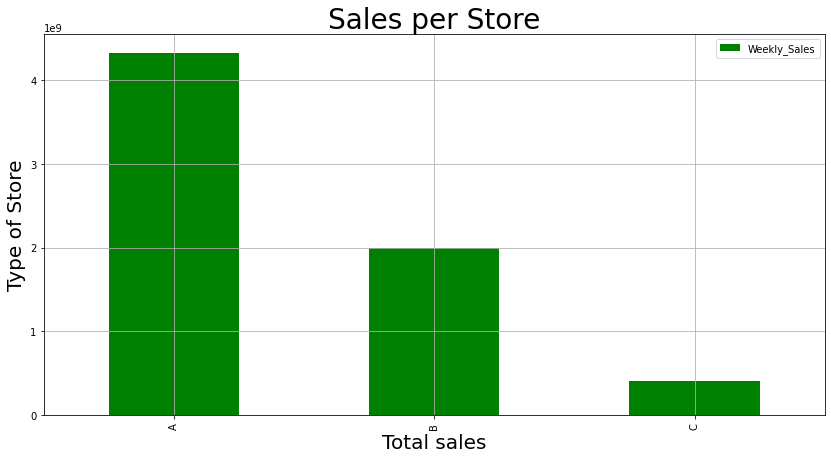

In [31]:
sales_per_store_df.plot(figsize=(14,7),kind='bar',grid=True,color='Green');
plt.title('Sales per Store',fontsize=28)
plt.xlabel('Total sales',fontsize=20)
plt.ylabel('Type of Store',fontsize=20)

It seems that the store of type A has the highest sales. Let's proceed to the next question

**Q2**: Which department per store had the highest sale?

In [32]:
# For store A
storeA_df=merged_df[merged_df['Type']=='A'].groupby('Dept')[['Weekly_Sales']].sum()

In [33]:
storeB_df=merged_df[merged_df['Type']=='B'].groupby('Dept')[['Weekly_Sales']].sum()

In [34]:
storeC_df=merged_df[merged_df['Type']=='C'].groupby('Dept')[['Weekly_Sales']].sum()

In [35]:
storeA_df

,Weekly_Sales
Dept,
1,7.222237e+07
2,1.635752e+08
3,4.366973e+07
4,1.037356e+08
5,8.349274e+07
...,...
95,3.054578e+08
96,5.428983e+07
97,6.950712e+07


Text(0, 0.5, 'Total Sales')

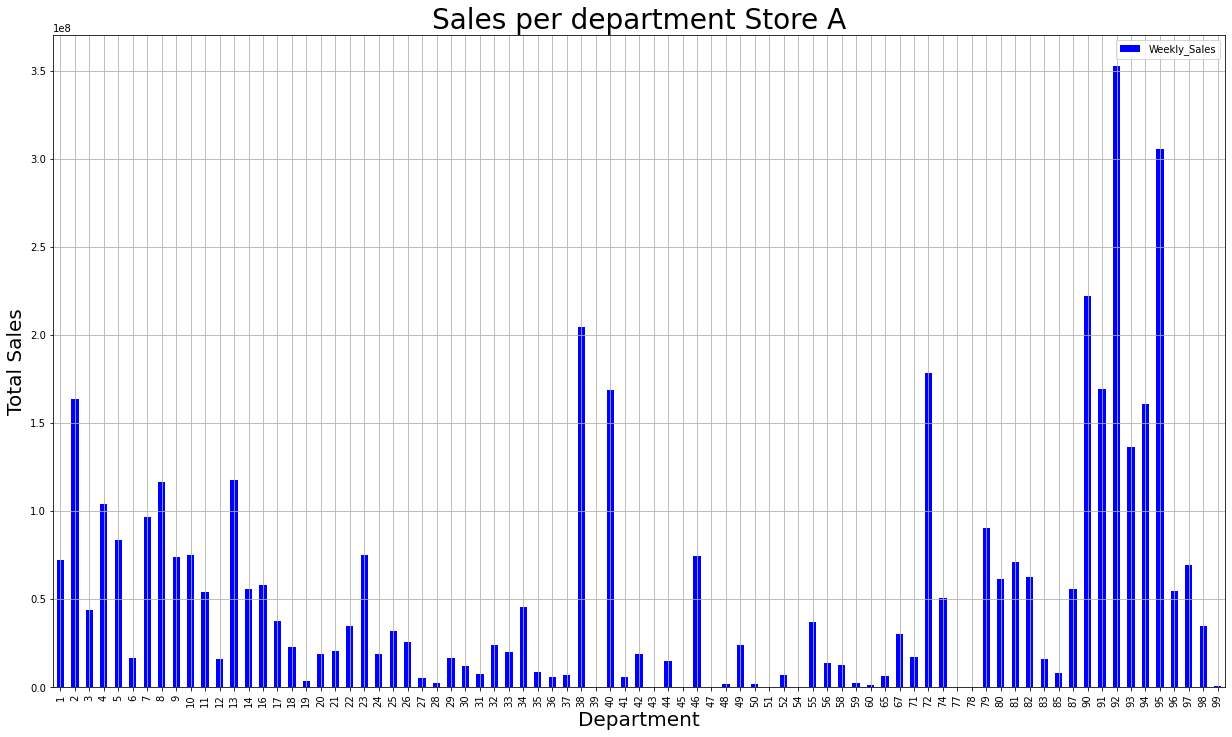

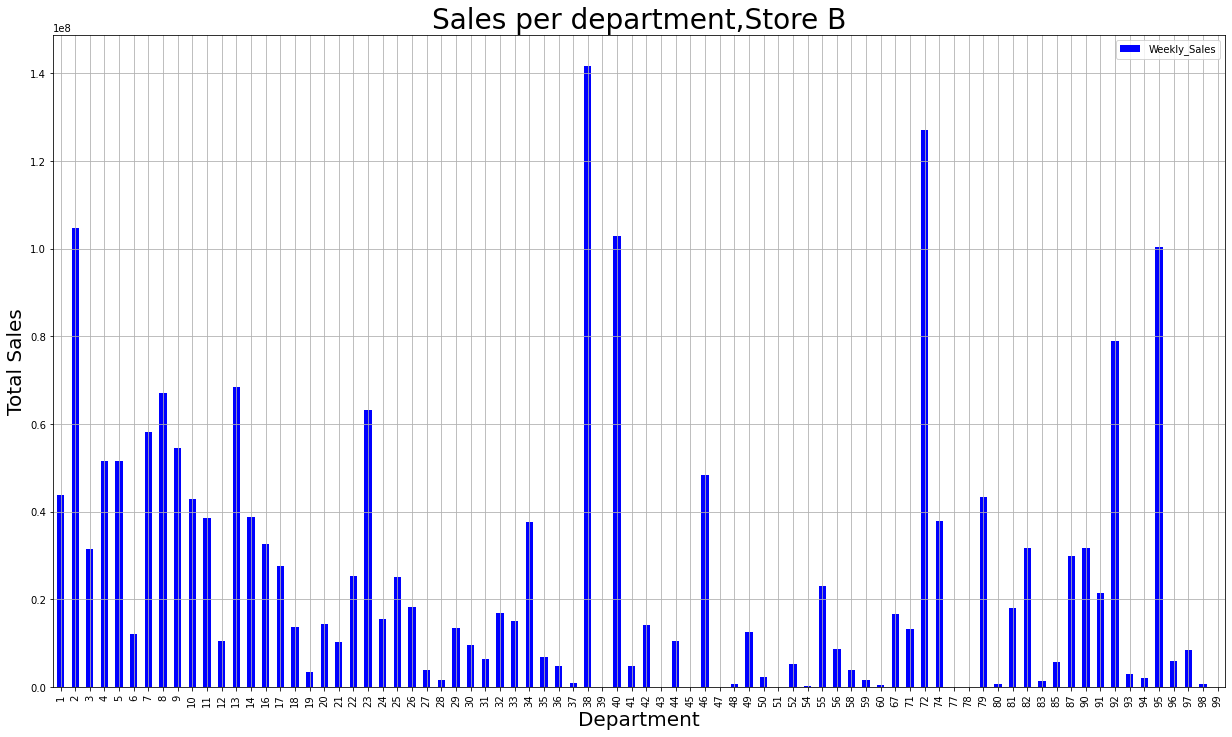

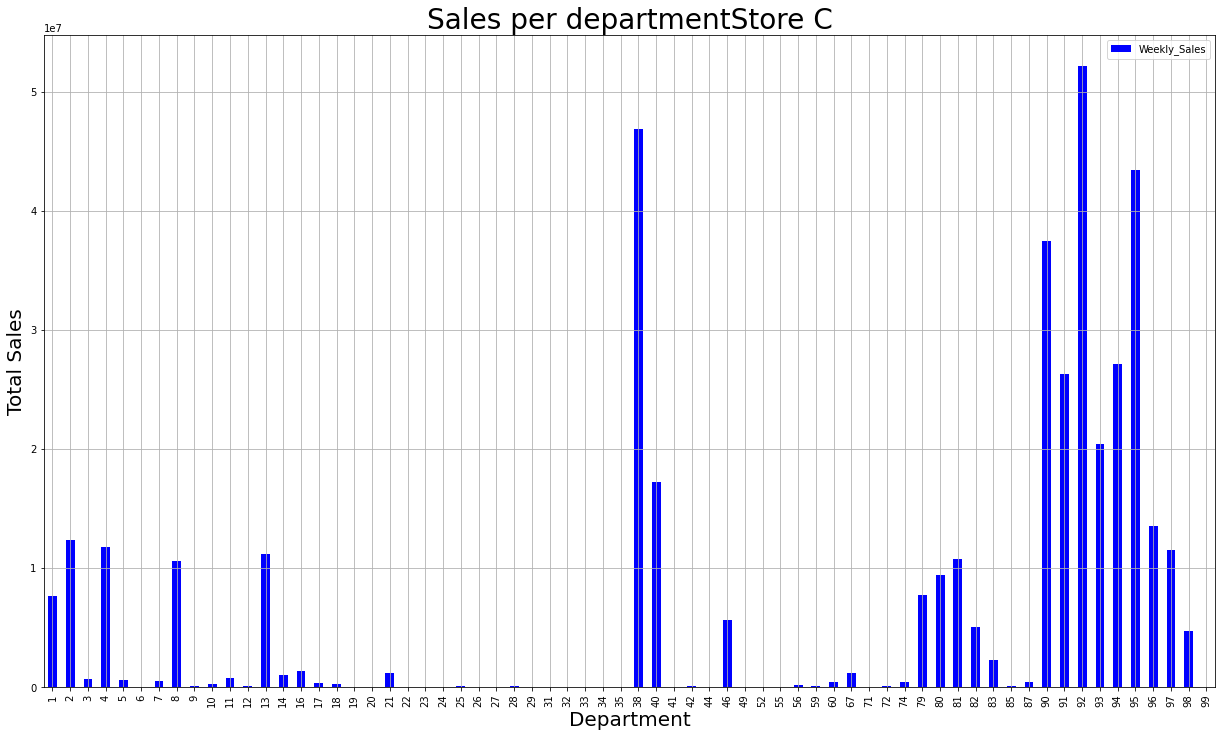

In [36]:
storeA_df.plot(figsize=(21, 12),kind='bar',grid=True,color='blue',legend=True);
plt.title('Sales per department Store A',fontsize=28)
plt.xlabel('Department',fontsize=20)
plt.ylabel('Total Sales',fontsize=20)

storeB_df.plot(figsize=(21, 12),kind='bar',grid=True,color='blue',legend=True);
plt.title('Sales per department,Store B',fontsize=28)
plt.xlabel('Department',fontsize=20)
plt.ylabel('Total Sales',fontsize=20)

storeC_df.plot(figsize=(21, 12),kind='bar',grid=True,color='blue',legend=True);
plt.title('Sales per departmentStore C',fontsize=28)
plt.xlabel('Department',fontsize=20)
plt.ylabel('Total Sales',fontsize=20)

There are many departments but those with the highest sales and common between the 3 stores are the Departments: **38,92,95**.

In [37]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,day,weekday
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4
420281,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4
420282,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4
420283,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4


**Q3: How are the sales per store vary over time?**

In [38]:
sales_store= merged_df.groupby(['Type','Date']).agg(sum_sales=('Weekly_Sales', 'sum'))
pd.DataFrame(sales_store)

sum_sales
Type Date                   
A    2010-01-10  27265553.22
     2010-02-04  32315183.88
     2010-02-07  31238640.48
     2010-02-19  31000951.30
     2010-02-26  28009040.98
...                      ...
C    2012-10-08   2922315.37
     2012-10-19   2907405.83
     2012-10-26   2854882.48
     2012-11-05   3019191.88
     2012-12-10   2963469.42

[429 rows x 1 columns]

Text(0.5, 0, 'Time')

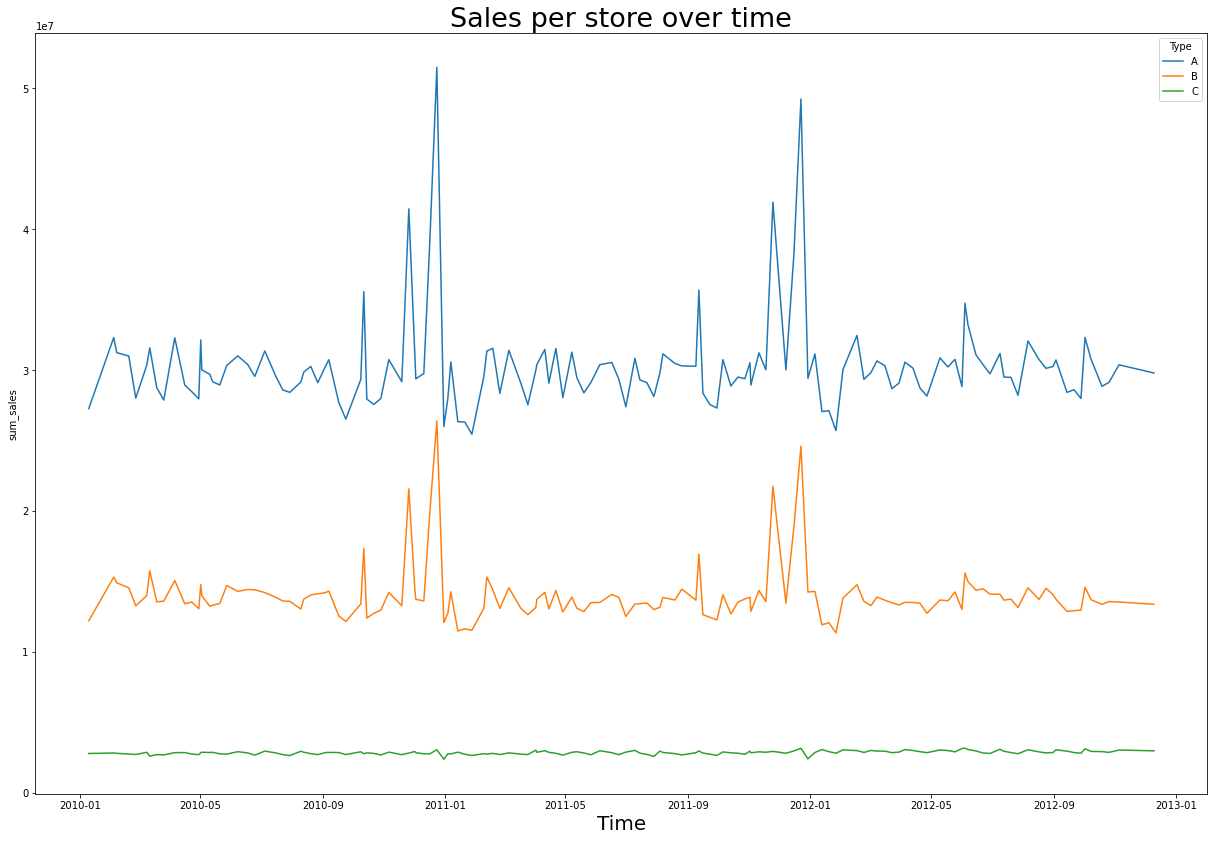

In [61]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = (21,14)
plt.title('Sales per store over time',fontsize=27)
sns.lineplot(data=sales_store, x='Date',y='sum_sales',hue='Type');
plt.xlabel('Sales',fontsize=20)
plt.xlabel('Time',fontsize=20)

It seems that the peak of the sales in Stores A and Store B is arounf christmas period and with lower fluctuations in the rest of the year.

**Q4: What are the sales over time of the 3 department with the highest sales?**

In [62]:
sales_dept=merged_df[(merged_df['Dept']==38) | (merged_df['Dept']==92) | (merged_df['Dept']==95)]
sales_dept

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,day,weekday
36,1,38,2010-05-02,115564.35,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
67,1,92,2010-05-02,139884.94,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
70,1,95,2010-05-02,106690.06,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
109,1,38,2010-12-02,94136.35,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.242170,8.106,True,A,151315,2010,12,2,3
139,1,92,2010-12-02,143081.42,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.242170,8.106,True,A,151315,2010,12,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420212,45,92,2012-10-19,48108.38,False,56.47,3.969,2004.02,NaN,3.18,...,1537.49,192.330854,8.667,False,B,118221,2012,10,19,4
420215,45,95,2012-10-19,48434.97,False,56.47,3.969,2004.02,NaN,3.18,...,1537.49,192.330854,8.667,False,B,118221,2012,10,19,4
420253,45,38,2012-10-26,47799.07,False,58.85,3.882,4018.91,58.08,100.00,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4
420279,45,92,2012-10-26,54608.75,False,58.85,3.882,4018.91,58.08,100.00,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4


In [63]:
sales_dept= sales_dept.groupby(['Dept','Date']).agg(sum_sales=('Weekly_Sales', 'sum'))
pd.DataFrame(sales_dept)

sum_sales
Dept Date                  
38   2010-01-10  2757997.35
     2010-02-04  2818801.67
     2010-02-07  2764357.00
     2010-02-19  2712708.65
     2010-02-26  2757264.39
...                     ...
95   2012-10-08  3476366.05
     2012-10-19  3017913.92
     2012-10-26  3002617.27
     2012-11-05  3277276.46
     2012-12-10  3078724.62

[429 rows x 1 columns]

Text(0.5, 0, 'Time')

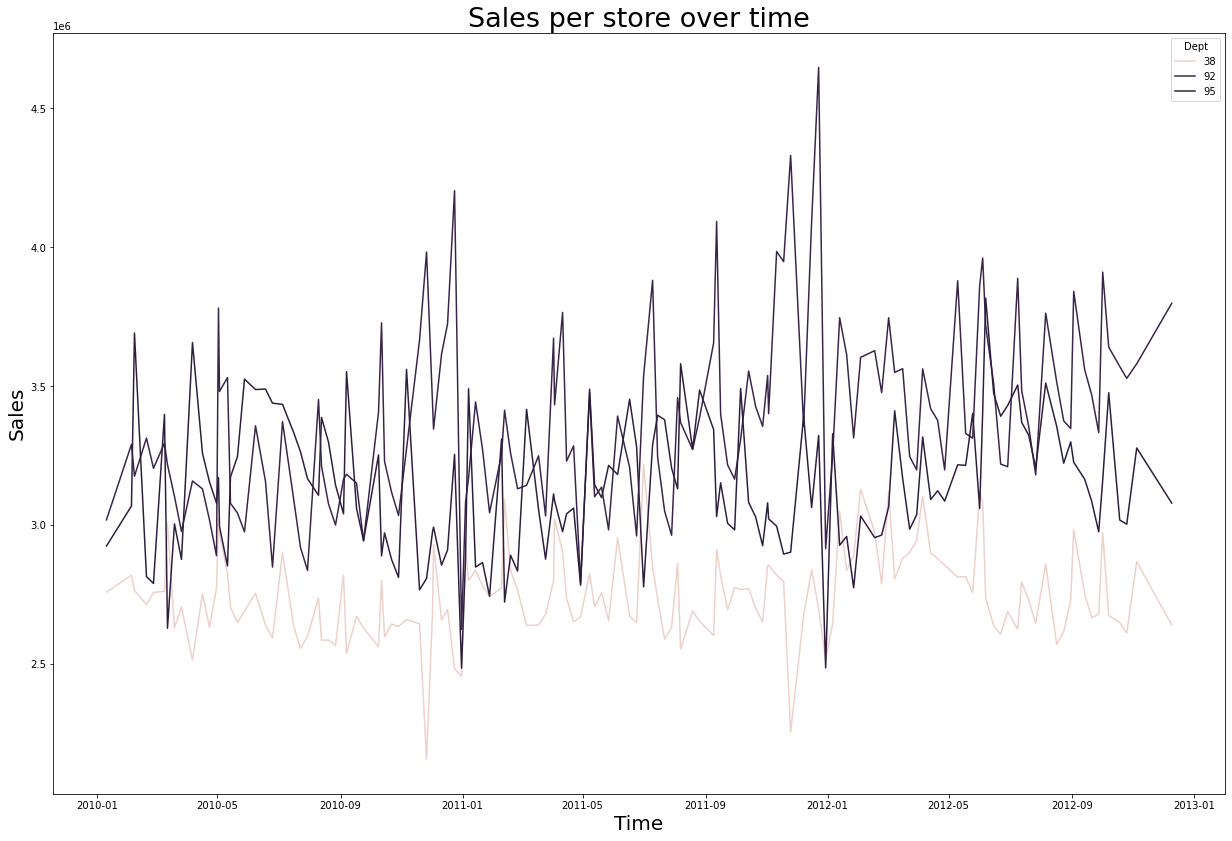

In [65]:
rcParams['figure.figsize'] = (21,14)
plt.title('Sales per store over time',fontsize=27)
sns.lineplot(data=sales_dept, x='Date',y='sum_sales',hue='Dept');
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Time',fontsize=20)

Although the departments present higher fluctuations, it is clear that the high season is again around christmas period.

**Q5: In which dates we have holiday season? Is it just christams or we have more during the year?**

In [66]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,day,weekday
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,5,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4
420281,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4
420282,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4
420283,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,False,B,118221,2012,10,26,4


In [67]:
holidays=merged_df.groupby(['IsHoliday_x','Date']).agg(Weekly_Sales=('Weekly_Sales','sum'))
holidays

Weekly_Sales
IsHoliday_x Date                    
False       2010-01-10   42240037.61
            2010-02-04   50424232.22
            2010-02-07   48917953.47
            2010-02-19   48277902.33
            2010-02-26   43970440.65
...                              ...
True        2011-11-02   47336816.90
            2011-11-25   66593835.85
            2011-12-30   46044300.91
            2012-07-09   48330449.03
            2012-10-02   50010196.60

[143 rows x 1 columns]

In [68]:
merged_df[merged_df['IsHoliday_x']==True].Date.unique()



array(['2010-12-02T00:00:00.000000000', '2010-10-09T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-11-02T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-10-02T00:00:00.000000000', '2012-07-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

Text(0.5, 0, 'Time')

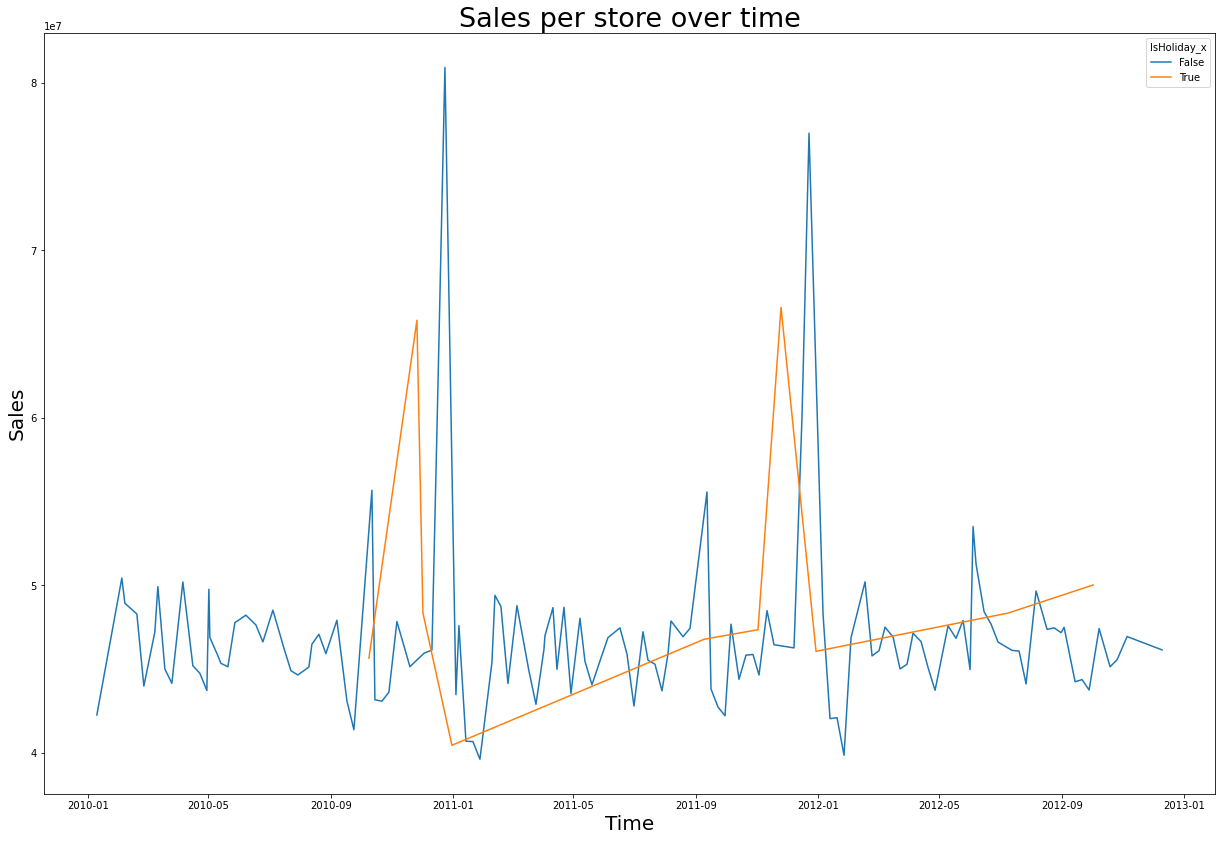

In [71]:
rcParams['figure.figsize'] = (21,14)
plt.title('Sales per store over time',fontsize=27)
sns.lineplot(data=holidays, x='Date',y='Weekly_Sales',hue='IsHoliday_x');
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Time',fontsize=20)

The highest sales are done at holiday period but alos in the end of the year which is not comsidered however as holiday.

**Q6: Which is the correlation between the sales of stores and unemployment rate?**

Text(0.5, 0, 'Unemployment %')

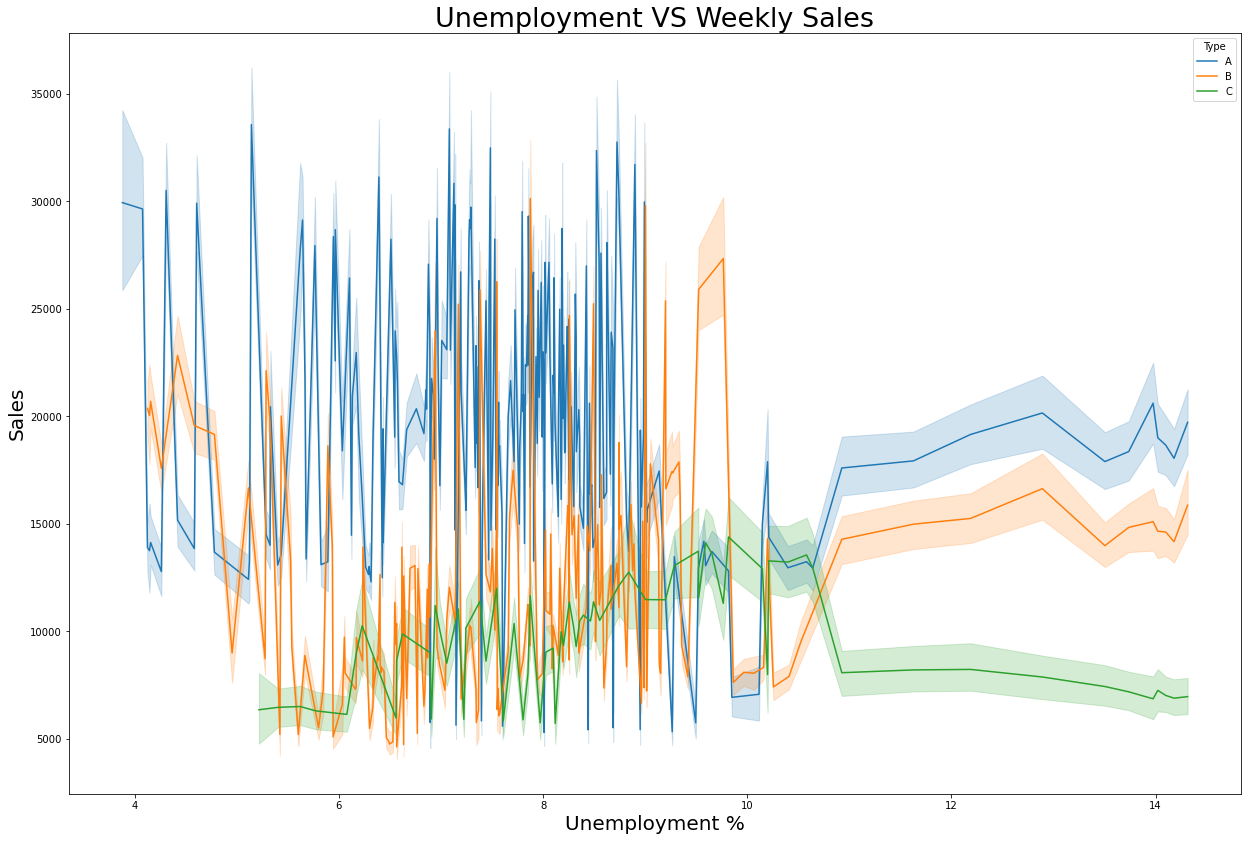

In [72]:
rcParams['figure.figsize'] = (21,14)
plt.title('Unemployment VS Weekly Sales',fontsize=27)
sns.lineplot(data=merged_df,x='Unemployment',y='Weekly_Sales',hue='Type');
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Unemployment %',fontsize=20)

It seems that the sales go lower when the unemployment rate inceases although there are many spikes that could be associated with holiday season or not. But it seems that unemployment has an influnece on the total sales of the stores. 

**Q7: Does the size of the stores have an influence in weekly sales?**


Text(0.5, 0, 'Size')

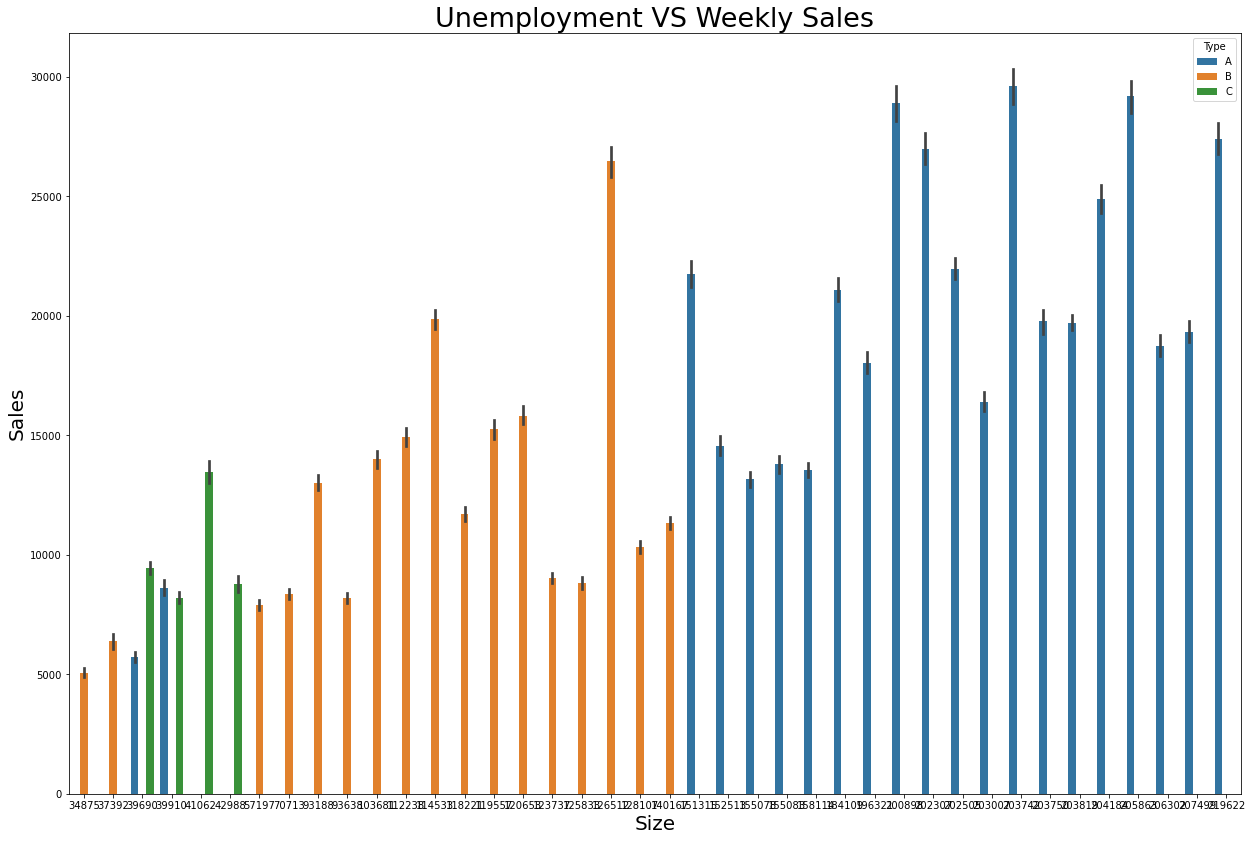

In [74]:
rcParams['figure.figsize'] = (21,14)
plt.title('Unemployment VS Weekly Sales',fontsize=27)
sns.barplot(data=merged_df,x='Size',y='Weekly_Sales',hue='Type');
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Size',fontsize=20)

It seems that the bigger the store the the trend is to have higher sales although this is not alwys the case.

## Conclusions

The conclusions from the EDA are the following

1. The Store A has the highest Sales among the 3 
2. The departments 38,92,95 present the highest sales amont 98 departments regrdless of the type od store
3. The weekly sales per store and department are higher in principle during holidays season and more speciffically the christmas period 
4. The unemployment rate of people has an influence but not signifivant on the weekly sales of the stores
5. The Size of the store influence the sales although that is not always the case


## For the future
Not that we are aware about the influence of some of the features, we can use them to build a machine learrning model that will predict the weekly sales in the future based on those historical data (regression tyoe of problem)


## References

1. https://seaborn.pydata.org/index.html
2. https://stackoverflow.com/
3. https://towardsdatascience.com/
4. https://www.jovian.ai/
5. https://www.kaggle.com/datasets/manjeetsingh/retaildataset